In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_9d3b41a5be1d463aa6b7e58bf2018c12 = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_9d3b41a5be1d463aa6b7e58bf2018c12 = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_9d3b41a5be1d463aa6b7e58bf2018c12 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='AzLaErm0uTDWoDEk13GhLaOUrwXy9ovopA5bhD93zSIg',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_9d3b41a5be1d463aa6b7e58bf2018c12)

body = client_9d3b41a5be1d463aa6b7e58bf2018c12.get_object(Bucket='codewithbharath-donotdelete-pr-y3eakurqdtrgio',Key='airfoil_self_noise.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body,sep='\t')
df.head()


,800,0,0.3048,71.3,0.00266337,126.201
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


In [2]:
df.columns = ['Frequency','angle_of_attack','chord-length','velocity','Thickness','target']

In [3]:
df

,Frequency,angle_of_attack,chord-length,velocity,Thickness,target
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571
...,...,...,...,...,...,...
1497,2500,15.6,0.1016,39.6,0.052849,110.264
1498,3150,15.6,0.1016,39.6,0.052849,109.254
1499,4000,15.6,0.1016,39.6,0.052849,106.604
1500,5000,15.6,0.1016,39.6,0.052849,106.224


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Frequency        1502 non-null   int64  
 1   angle_of_attack  1502 non-null   float64
 2   chord-length     1502 non-null   float64
 3   velocity         1502 non-null   float64
 4   Thickness        1502 non-null   float64
 5   target           1502 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


In [5]:
df.isna().sum()

Frequency          0
angle_of_attack    0
chord-length       0
velocity           0
Thickness          0
target             0
dtype: int64

# EDA

<AxesSubplot:>

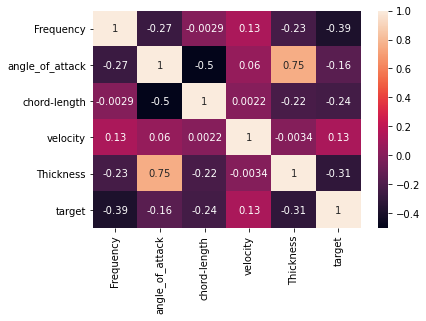

In [6]:
sns.heatmap(df.corr(),annot=True)

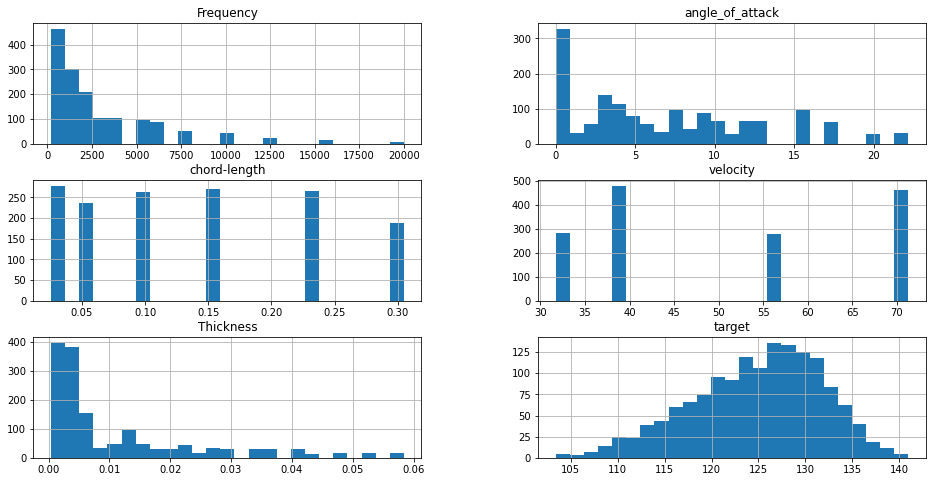

In [7]:
df.hist(bins=25,figsize=(16,8));

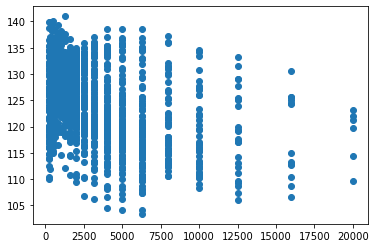

In [8]:
plt.scatter(df.Frequency,df.target)

# preprocessing

In [9]:
X = df.drop('target',axis=1)
y= df['target']

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
for i in X.columns:
    X[i] = scaler.fit_transform(X[[i]])

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

# Model Selection

# Algorithms

## Linear Regression
## Decision Tree
## Support Vector Regression
## Lasso Regression
## Random Forest Regressor

# Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [14]:
y_pred = reg.predict(X_test)

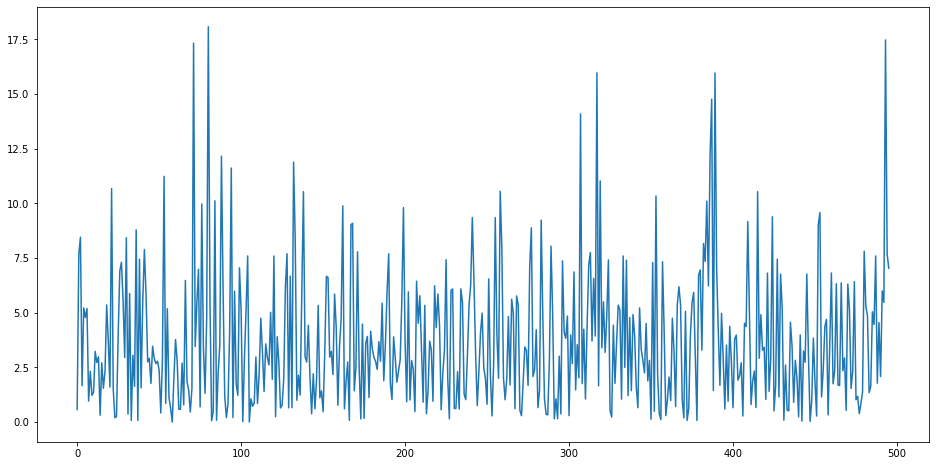

In [15]:
#Error Calculation
sample_test = np.array(y_test)
error = []
for i in range(len(y_test)):
    err = np.sqrt((sample_test[i] - y_pred[i])**2)
    error.append(err)
plt.figure(figsize=(16,8))
plt.plot(error)
plt.show()

# Accuracy Calculation
# MSE,MAE,RMSE

In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [17]:
print("MSE = ",mean_squared_error(y_test,y_pred))
print("MAE = ", mean_absolute_error(y_test,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))

MSE =  23.148665401633266
MAE =  3.6911064941764353
RMSE =  4.811305997505591


# Decision Tree Regressor

In [18]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=10).fit(X_train,y_train)

In [19]:
y_pred = reg.predict(X_test)

In [20]:
print("MSE = ",mean_squared_error(y_test,y_pred))
print("MAE = ", mean_absolute_error(y_test,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))

MSE =  7.064897436588448
MAE =  2.036141704130971
RMSE =  2.6579874786365054
